In [104]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler,MinMaxScaler

In [26]:
print(tf.__version__)

2.12.0


# Diabetes Dataset Preprocessing

In [27]:
df = pd.read_csv("Dataset/diabetes.csv")
df = df.dropna(axis=1,how='all')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


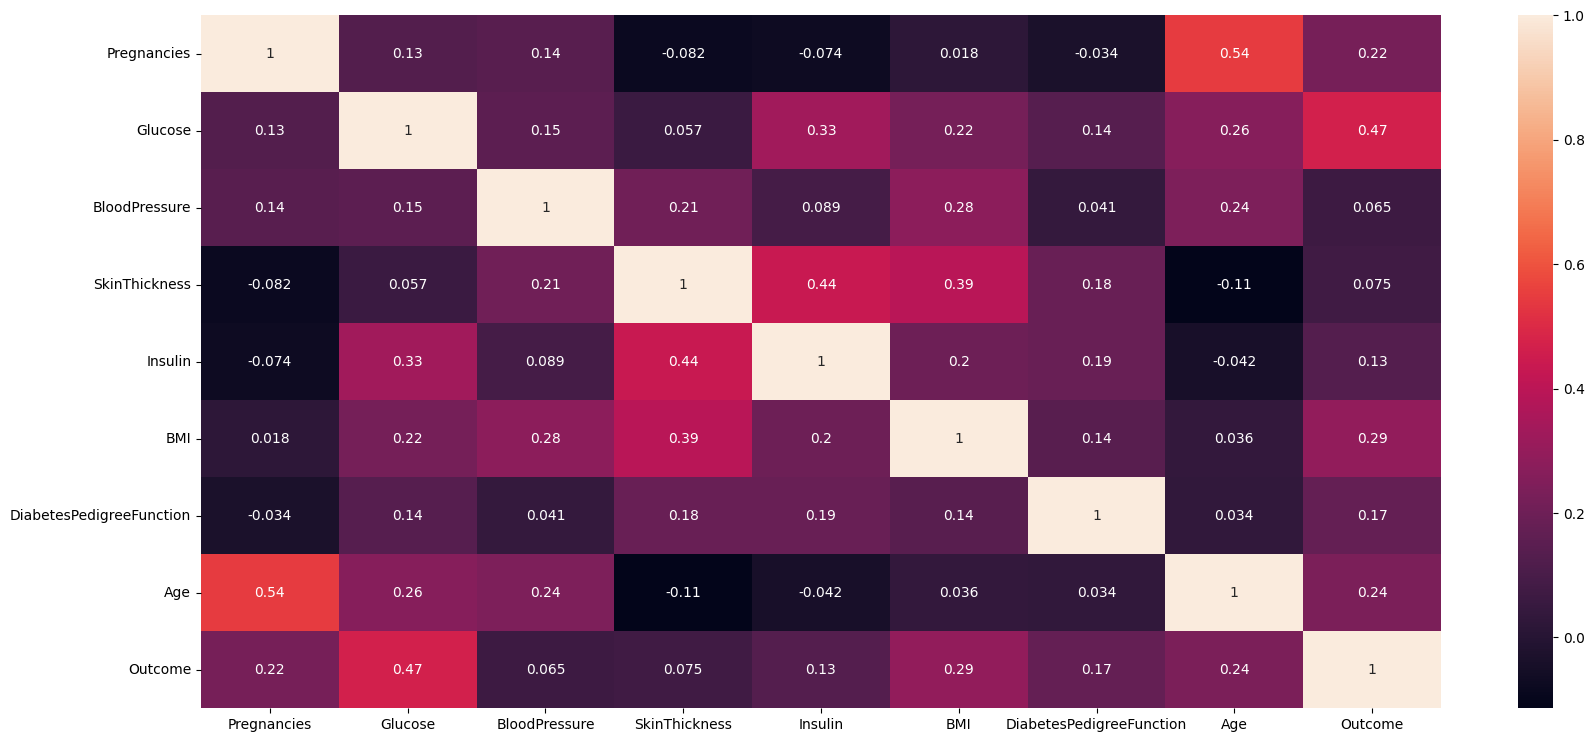

In [28]:
print(df.columns)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [29]:
num_missing = df.isnull().sum()
percentage_missing = df.isnull().sum().apply(lambda x: x/df.shape[0]*100)
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})
missing_data['Percentage of Missing'].sort_values(ascending = False)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
Name: Percentage of Missing, dtype: float64

/var/folders/jx/rkmwv0193mbgyy9qhk2gc2qw0000gn/T/ipykernel_62404/449296457.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

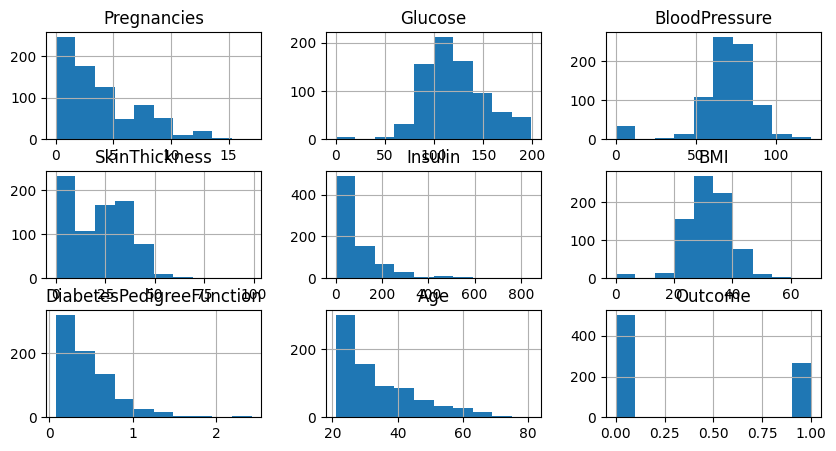

In [30]:
fig, ax = plt.subplots(1, figsize=(10, 5))
df.hist(ax=ax)

In [31]:
df = shuffle(df)
bal = df.groupby('Outcome')
bal = bal.apply(lambda x: x.sample(bal.size().min())).reset_index(drop=True)

In [32]:
y = bal['Outcome']
X = bal.drop(columns='Outcome',axis=1)

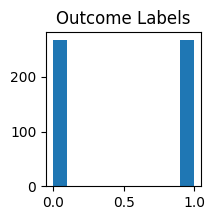

In [33]:
f, ax = plt.subplots(figsize=(2, 2))
plt.title("Outcome Labels")
plt.hist(y)
plt.show()

In [34]:
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X.values), columns=X.columns, index=X.index)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.371859,0.000000,0.000000,0.0,0.000000,0.007705,0.019608
1,0.000000,0.567839,0.655738,0.161616,0.0,0.461997,0.338185,0.000000
2,0.470588,0.552764,0.622951,0.000000,0.0,0.414307,0.065497,0.725490
3,0.529412,0.532663,0.426230,0.000000,0.0,0.464978,0.126712,0.411765
4,0.117647,0.407035,0.491803,0.222222,0.0,0.412817,0.088185,0.078431


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


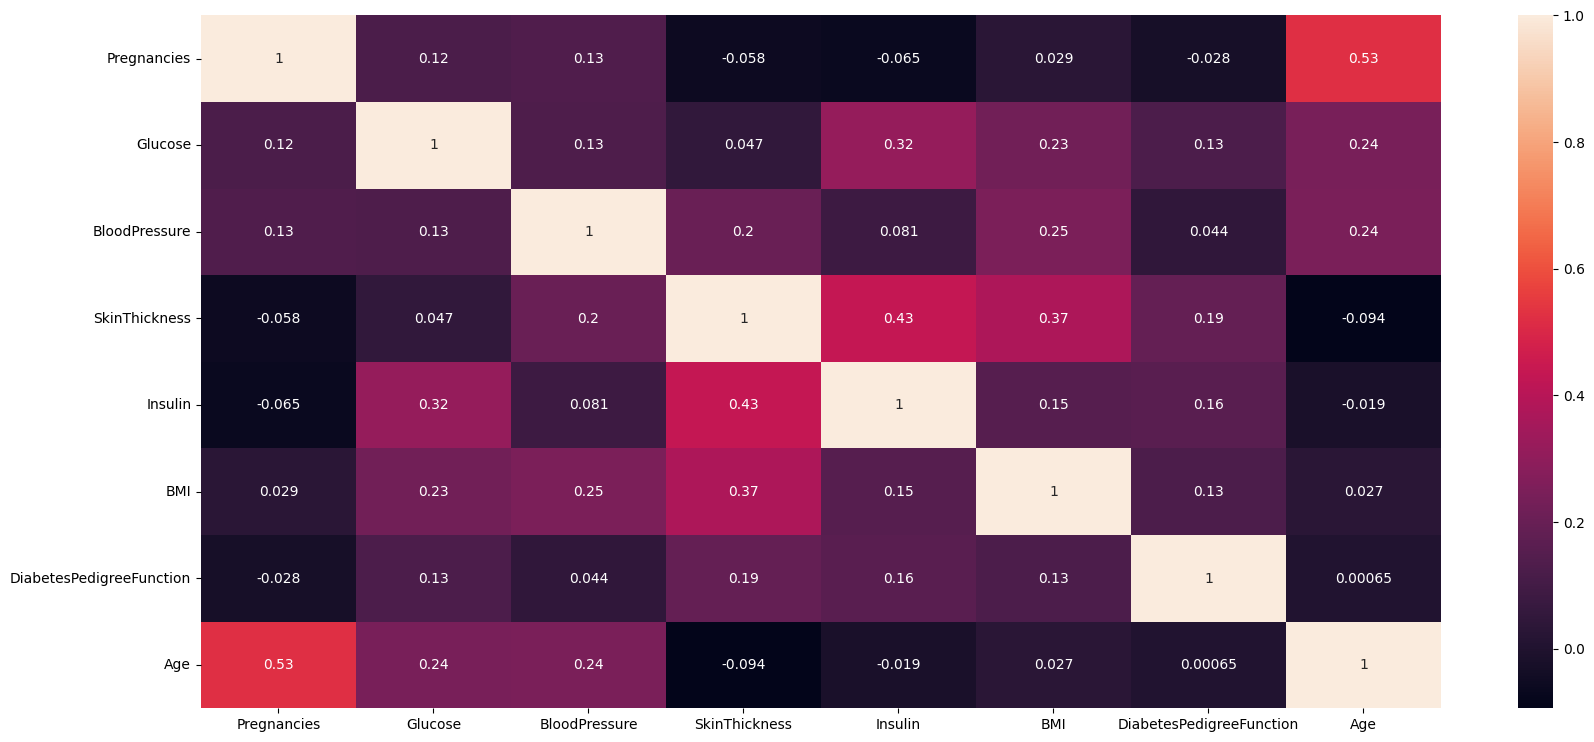

In [35]:
print(X.columns)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Backpropogation

In [37]:
model = Sequential()
model.add(Dense(16, input_shape=(8,), activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
m_optimizer=optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer = m_optimizer)
model.build(input_shape=X_train.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8088 (Dense)          (None, 16)                144       
                                                                 
 dense_8089 (Dense)          (None, 8)                 136       
                                                                 
 dense_8090 (Dense)          (None, 4)                 36        
                                                                 
 dense_8091 (Dense)          (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train,y_train,verbose=1,epochs=200,batch_size=10, validation_data=(X_test,y_test),shuffle=True)

Epoch 1/200
38/38 [==============================] - 10s 142ms/step - loss: 0.2563 - accuracy: 0.4987 - val_loss: 0.2534 - val_accuracy: 0.5031
Epoch 2/200
38/38 [==============================] - 1s 14ms/step - loss: 0.2526 - accuracy: 0.4987 - val_loss: 0.2510 - val_accuracy: 0.5031
Epoch 3/200
38/38 [==============================] - 0s 12ms/step - loss: 0.2510 - accuracy: 0.4987 - val_loss: 0.2504 - val_accuracy: 0.5031
Epoch 4/200
38/38 [==============================] - 0s 11ms/step - loss: 0.2504 - accuracy: 0.4987 - val_loss: 0.2499 - val_accuracy: 0.5031
Epoch 5/200
38/38 [==============================] - 0s 13ms/step - loss: 0.2500 - accuracy: 0.4987 - val_loss: 0.2496 - val_accuracy: 0.5031
Epoch 6/200
38/38 [==============================] - 0s 11ms/step - loss: 0.2498 - accuracy: 0.4987 - val_loss: 0.2495 - val_accuracy: 0.5031
Epoch 7/200
38/38 [==============================] - 0s 8ms/step - loss: 0.2496 - accuracy: 0.4987 - val_loss: 0.2494 - val_accuracy: 0.5093
Epoch

In [42]:
accuracy_score(y_test,model.predict(X_test).round())

6/6 [==============================] - 0s 19ms/step


0.7267080745341615

6/6 [==============================] - 0s 7ms/step


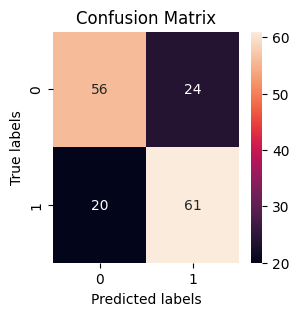

In [110]:
y_pred = model.predict(X_test)
y_pred_nn = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_nn)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title("Confusion Matrix")
plt.show()

In [41]:
model.save("backprop_adam_diabetes.h5")

In [114]:
model_sgd = Sequential()
model_sgd.add(Dense(16, input_shape=(8,), activation='sigmoid'))
model_sgd.add(Dense(8, activation='sigmoid'))
model_sgd.add(Dense(4, activation='sigmoid'))
model_sgd.add(Dense(1, activation='sigmoid'))
m_optimizer=optimizers.SGD(learning_rate=0.01, momentum = 0.1)
model_sgd.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer = m_optimizer)
model_sgd.build(input_shape=X_train.shape)
model_sgd.summary()
model_sgd.fit(X_train,y_train,verbose=1,epochs=200,batch_size=10, validation_data=(X_test,y_test),shuffle=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8108 (Dense)          (None, 16)                144       
                                                                 
 dense_8109 (Dense)          (None, 8)                 136       
                                                                 
 dense_8110 (Dense)          (None, 4)                 36        
                                                                 
 dense_8111 (Dense)          (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
38/38 [==============================] - 4s 61ms/step - loss: 0.7176 - accuracy: 0.4987 - val_loss: 0.7094 - val_accuracy: 0.5031
Epoch 2/200
38/38 [===========================

In [115]:
accuracy_score(y_test,model_sgd.predict(X_test).round())

6/6 [==============================] - 0s 9ms/step


0.4968944099378882

6/6 [==============================] - 0s 14ms/step


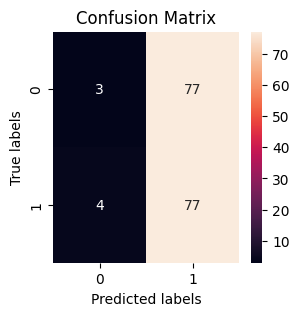

In [116]:
y_pred_sgd = model_sgd.predict(X_test)
y_pred_sgd = np.round(y_pred_sgd)
cm = confusion_matrix(y_test, y_pred_sgd)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title("Confusion Matrix")
plt.show()

# Genetic Algorithm

### Reference: 
https://github.com/chiatsekuo/Genetic_Algorithm/ \
https://medium.com/swlh/genetic-algorithm-in-artificial-neural-network-5f5b9c9467d0

In [17]:
class ANN(Sequential):  
    def __init__(self, child_weights=None):
        super().__init__()

        if child_weights is None:
            layer1 = Dense(16, input_shape=(8,), activation='sigmoid')
            layer2 = Dense(8, activation='sigmoid')
            layer3 = Dense(4, activation='sigmoid')
            layer4 = Dense(1, activation='sigmoid')
            self.add(layer1)
            self.add(layer2)
            self.add(layer3)
            self.add(layer4)
        else:
            self.add(
                Dense(
                    16,
                    input_shape=(8,),
                    activation='sigmoid',
                    weights=[child_weights[0], np.ones(16)])
                )
            self.add(
                Dense(
                    8,
                    activation='sigmoid',
                    weights=[child_weights[1], np.zeros(8)])
            )
            self.add(
                Dense(
                    4,
                    activation='sigmoid',
                    weights=[child_weights[2], np.zeros(4)])
            )
            self.add(
                Dense(
                    1,
                    activation='sigmoid',
                    weights=[child_weights[3], np.zeros(1)])
            )

    def forward_propagation(self, train_feature, train_label):
            predict_label = self.predict(train_feature.values)
            self.fitness = accuracy_score(train_label, predict_label.round())

    def compile_train(self, epochs,train_feature, train_label):
        self.compile(
                        optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                        loss='binary_crossentropy',
                        metrics=['accuracy']
                        )
        self.fit(train_feature.values, train_label.values, epochs=epochs)

def crossover(nn1, nn2):
    
    nn1_weights = []
    nn2_weights = []
    child_weights = []

    for layer in nn1.layers:
        nn1_weights.append(layer.get_weights()[0])

    for layer in nn2.layers:
        nn2_weights.append(layer.get_weights()[0])

    for i in range(len(nn1_weights)):
        # Get single point to split the matrix in parents based on # of cols
        split = random.randint(0, np.shape(nn1_weights[i])[1]-1)
        # Iterate through after a single point and set the remaing cols to nn_2
        for j in range(split, np.shape(nn1_weights[i])[1]-1):
            nn1_weights[i][:, j] = nn2_weights[i][:, j]

        child_weights.append(nn1_weights[i])

    mutation(child_weights)

    child = ANN(child_weights)
    return child

def mutation(child_weights):
    selection = random.randint(0, len(child_weights)-1)
    mut = random.uniform(0, 1)
    if mut <= .05:
        child_weights[selection] *= random.randint(2, 5)
    else:
        pass

In [18]:
networks = []
pool = []
# Generation counter
generation = 0
# Initial Population
population = 20
for i in range(population):
    networks.append(ANN())
# Track Max Fitness
max_fitness = 0
# Store Max Fitness Weights
optimal_weights = []

epochs = 200
# Evolution Loop
for i in range(epochs):
    generation += 1
    for ann in networks:
        # Propagate to calculate fitness score
        ann.forward_propagation(X_train, y_train)
        # Add to pool after calculating fitness
        pool.append(ann)

    # Clear for propagation of next children
    networks.clear()

    # Sort anns by fitness
    pool = sorted(pool, key=lambda x: x.fitness)
    pool.reverse()

    # Find Max Fitness and Log Associated Weights
    for i in range(len(pool)):
        if pool[i].fitness > max_fitness:
            max_fitness = pool[i].fitness
            # print("Max Fitness: " + str(max_fitness) + "\r\n")

            # Iterate through layers, get weights, and append to optimal
            optimal_weights = []
            for layer in pool[i].layers:
                optimal_weights.append(layer.get_weights()[0])
            # print('optimal_weights: ' + str(optimal_weights)+"\r\n")

    # Crossover: top 5 randomly select 2 partners
    for i in range(5):
        for j in range(2):
            # Create a child and add to networks
            temp = crossover(pool[i], random.choice(pool))
            # Add to networks to calculate fitness score next iteration
            networks.append(temp)
    

# Create a Genetic Neural Network with optimal initial weights
ann = ANN(optimal_weights)
ann.compile_train(epochs,X_train,y_train)
predict_label = ann.predict(X_test.values)
print('Test Accuracy: %.2f' % accuracy_score(y_test, predict_label.round()))

12/12 [==============================] - 1s 22ms/step


Epoch 1/200
12/12 [==============================] - 4s 158ms/step - loss: 0.2472 - accuracy: 0.7067
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2470 - accuracy: 0.7307
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2469 - accuracy: 0.7440
Epoch 4/200
12/12 [==============================] - 0s 14ms/step - loss: 0.2468 - accuracy: 0.7253
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.6853
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.7147
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2464 - accuracy: 0.7413
Epoch 8/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.7360
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 0.2460 - accuracy: 0.7547
Epoch 10/200
12/12 [==============================] - 0s 7ms/step - loss: 0.2459 - accuracy: 0.7467
Epoc

6/6 [==============================] - 0s 45ms/step


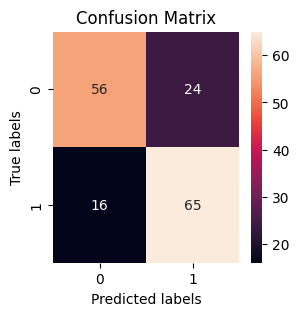

In [109]:
y_pred = ann.predict(X_test)
y_pred_ga = np.round(y_pred)
cm = confusion_matrix(y_test, y_pred_ga)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title("Confusion Matrix")
plt.show()

# MCTS-GA

### Application of MCTS to GA for optimizing search

In [85]:
class Node():
    def __init__(self, state,parent=None):
        self.state = state # population
        self.visit_count = 0 # n
        self.score_total = 0 # w
        # self.score_estimate = 0 # q
        self.parent = parent 
        self.child_list = []
        # self.action = None

    def update(self,score):
        self.visit_count +=1
        self.score_total += score

    def children(self):
        # if self.child_list == None:
        #     self.child_list = self.genetic_action()
            # list(map(Node, children_of(self.state)))
        return self.child_list

    def N_values(self):
        return [c.visit_count for c in self.children()]

    def Q_values(self):
        children = self.children()
        # sign = +1 if get_player(self.state) == "X" else -1
        Q = [c.score_total / (c.visit_count+1) for c in children]
        # Q = [sign * c.score_total / max(c.visit_count, 1) for c in children]
        return Q

    def is_leaf(self):
        return len(self.child_list) == 0

In [86]:
# Monte Carlo Tree Search
class MCTS():
    def __init__(self,model,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model

    # Mostly not needed
    def expand(self, node):
        return node.children()[np.argmax(node.Q_values())]

    def explore(self, node):
        return node.children()[np.argmin(node.N_values())]

    def uct(self, node,exploration_constant=2):
        # max_c Qc + sqrt(ln(Np) / Nc)
        Q = np.array(node.Q_values())
        N = np.array(node.N_values())
        U = Q + np.sqrt(exploration_constant * np.log(node.visit_count + 1) / (N + 1))
        return node.children()[np.argmax(U)]

    def backtrack(self, node):
        # update the q and n values till root
        score = node.score_total
        node = node.parent
        while node:
            node.update(score)
            node = node.parent
            
    def fitness(self, state):
        W = np.array([])
        for i,layer in enumerate(self.model.layers):
            layer_w = layer.get_weights()
            layer_w[0] = state[i]
            W = np.append(W,layer_w)
        self.model.set_weights(W)
        _, fitness = model.evaluate(self.X_train, self.y_train, verbose=0)
        return fitness

    def init_root(model):
        template = []
        for layer in model.layers:
            template.append(layer.get_weights()[0])
        return Node(template)

    def genetic_action(self,node):
        # Create population
        def generate_population(state):
            child_population =[]
            for i,weights in enumerate(state):
                # Adding uniform distribution
                r = np.random.uniform(-1,1,size = weights.shape[1])
                for j in range(weights.shape[1]):
                    weights[:,j] += r[j]          
                new_weight = state.copy()
                new_weight[i] = weights
                child_population.append(new_weight)
            # add supernode
            child_population.append(state)
            return child_population #return list of weight population
        
        # Select 1 from 3 in array of 5
        def tournament_selection(population,k):
            #population is the node
#             print(len(population))
#             print(population[0])
            best = None
            ind = np.random.choice(np.arange(len(population)),k, replace=False)
            for i in ind:
                if best == None or self.fitness(population[i])>self.fitness(best):
                    best = population[i]
            return best

        # Apply crossover on 2 selected
        def crossover(c_prob,individual_1,individual_2):
            if np.random.rand() < c_prob:
                for i,l_w in enumerate(individual_1):
                    crx_index = np.random.choice( np.arange(len(l_w)) )
                    individual_1[i][:crx_index],individual_2[i][:crx_index] = individual_2[i][:crx_index],individual_1[i][:crx_index]
            return individual_1,individual_2

        # Mutate 
        def mutation(mu,individual_1,individual_2):
            if np.random.rand() < mu:
                for i,l_w in enumerate(individual_1):
                    index = np.random.choice(np.arange(len(l_w)))
                    individual_1[i][index],individual_2[i][index] = individual_2[i][index],individual_1[i][index]
            # Select one of the two mutated children
            return [individual_1,individual_2][np.random.randint(2)]

        state = node.state
        population = generate_population(state)
#         print(len(population))
        children = []
        for _ in range(len(population)):
            # Tournament selection
            individual_2 = tournament_selection(population,3)
            # 1ptx Crossover with original node to get 2 children
            cross_children = crossover(0.75,state,individual_2) 
            # Random Mutation
            mutated_child = mutation(0.25,*cross_children)
            children.append(mutated_child)
        return list(map(Node, children,[node]*len(children))) # returned 5 genetic nodes
    
    def rollout(self,node:Node):
        def mutate_population(mutation_rate,state):
            # generate random mutations on the parents
            W = []
            for weights_list in state:
                weights_list += np.random.normal(0, mutation_rate, size=weights_list.shape)
                # offspring = parents + mutation_rate * np.random.randn(parents.shape[0], parents.shape[1])
                W.append(weights_list)
            return W

        def select_survivors(parents, offspring, elite_ratio):
            # combine parents and offspring and select the best individuals to survive
            all_solutions = np.vstack((parents, offspring))
            all_fitness = np.array([self.fitness(solution) for solution in all_solutions])
            # print(all_solutions.shape)
            elite_size = int(elite_ratio * all_solutions.shape[0])
            # print("elite size:", elite_size)
            elite_idx = np.argsort(all_fitness)[::-1][:elite_size]
            survivors = all_solutions[elite_idx]
            return survivors

        def evolutionary_rollout(node:Node,lambda_=5, sampling_frequency=5, max_iterations=10, mutation_rate=0.01, rate_of_change=0.6, elite_ratio=0.8):
            # initialize population
            parent = node.state.copy()
            # run iterations
            k=0
            while k < max_iterations:
                counter = 0
                for n in range(sampling_frequency):
                    # print("Sample: ", n)
                    offsprings = []
                    for l in range(lambda_):
                        # mutate the parents and generate offspring
                        # parent_index = l%2
                        # print("parents:", len(parents))
                        offspring = mutate_population(mutation_rate,parent)
#                         print(len(offspring))
                        offsprings.append(offspring)
                        # evaluate fitness and count success rate
                        parent_fitness = self.fitness(parent)
                        offspring_fitness = self.fitness(offspring)
                        # success_count = np.sum(offspring_fitness > parent_fitness)
                        if offspring_fitness>parent_fitness:
                            counter += 1
                            # print("\nCounter:",counter)
                    # select survivors for next generation
                    parents = select_survivors(parent, offsprings, elite_ratio)
                    # print("Survivor parents:",len(parents))
                    k+=1
                # adjust mutation rate based on success rate
                if counter < (n*lambda_/5):
                    mutation_rate = (1-rate_of_change) * mutation_rate
                else:
                    mutation_rate = (1+rate_of_change) * mutation_rate
                final_fitness = [self.fitness(parent) for parent in parents]
                best_fitness = np.argmax(final_fitness)
            return parents[best_fitness],final_fitness[best_fitness]
        state,score = evolutionary_rollout(node)
        if score>node.score_total:
            print("Better aged solution found:")
            node.state = state
            node.score_total = score
        return node

In [87]:
def mcts_ga(model,generation,X_train,y_train):
    new_model = tf.keras.models.clone_model(model)
    state = []
    for layer in new_model.layers:
        state.append(layer.get_weights()[0])
    root = Node(state)

    mcts = MCTS(new_model,X_train,y_train)
    root.visit_count +=1
    root.score_total += mcts.fitness(root.state)
    best_fit = root

    for g in range(generation):
        print("Generation:",g)
        node = root
        while node.child_list:
            node = mcts.uct(node)
        if node.is_leaf():
            node.child_list = mcts.genetic_action(node)
#             node = mcts.explore(node)
            node = random.choice(node.child_list)
        node.score_total = mcts.fitness(node.state)
        node.visit_count += 1
        # perform rollout
        node = mcts.rollout(node)
        if mcts.fitness(node.state)>mcts.fitness(best_fit.state):
            best_fit = node
        mcts.backtrack(node)

    return best_fit.state

In [96]:
mcts_weights = mcts_ga(model,20,X_train,y_train)

/Users/akshayhebbar/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)
/Users/akshayhebbar/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)
/Users/akshayhebbar/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-

In [97]:
mcts_W = np.array([])
for i,layer in enumerate(model.layers):
    layer_w = layer.get_weights()
    layer_w[0] = mcts_weights[i]
    mcts_W = np.append(mcts_W,layer_w)

mcts_model = Sequential()
mcts_model.add(Dense(16, input_shape=(8,), activation='sigmoid'))
mcts_model.add(Dense(8, activation='sigmoid'))
mcts_model.add(Dense(4, activation='sigmoid'))
mcts_model.add(Dense(1, activation='sigmoid'))
m_optimizer=optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
mcts_model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer = m_optimizer)
mcts_model.set_weights(mcts_W)
mcts_model.fit(X_train,y_train,verbose=1,epochs=200,batch_size=10, validation_data=(X_test,y_test),shuffle=True)

/Users/akshayhebbar/Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


Epoch 1/200
38/38 [==============================] - 3s 63ms/step - loss: 0.3482 - accuracy: 0.5013 - val_loss: 0.3455 - val_accuracy: 0.4969
Epoch 2/200
38/38 [==============================] - 1s 17ms/step - loss: 0.3380 - accuracy: 0.5013 - val_loss: 0.3355 - val_accuracy: 0.4969
Epoch 3/200
38/38 [==============================] - 0s 10ms/step - loss: 0.3282 - accuracy: 0.5013 - val_loss: 0.3255 - val_accuracy: 0.4969
Epoch 4/200
38/38 [==============================] - 0s 10ms/step - loss: 0.3185 - accuracy: 0.5013 - val_loss: 0.3160 - val_accuracy: 0.4969
Epoch 5/200
38/38 [==============================] - 0s 10ms/step - loss: 0.3095 - accuracy: 0.5013 - val_loss: 0.3073 - val_accuracy: 0.4969
Epoch 6/200
38/38 [==============================] - 0s 8ms/step - loss: 0.3012 - accuracy: 0.5013 - val_loss: 0.2989 - val_accuracy: 0.4969
Epoch 7/200
38/38 [==============================] - 0s 8ms/step - loss: 0.2937 - accuracy: 0.5013 - val_loss: 0.2919 - val_accuracy: 0.4969
Epoch 8/

In [98]:
print("MCTS")
accuracy_score(y_test,mcts_model.predict(X_test).round())

6/6 [==============================] - 1s 61ms/step


0.7453416149068323

6/6 [==============================] - 0s 3ms/step


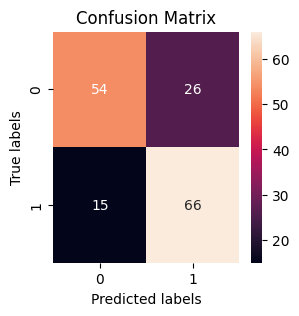

In [107]:
y_pred = mcts_model.predict(X_test)
y_pred_mcts = np.round(y_pred)
cm_mcts = confusion_matrix(y_test, y_pred_mcts)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm_mcts, annot=True, ax = ax,fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title("Confusion Matrix")
plt.show()

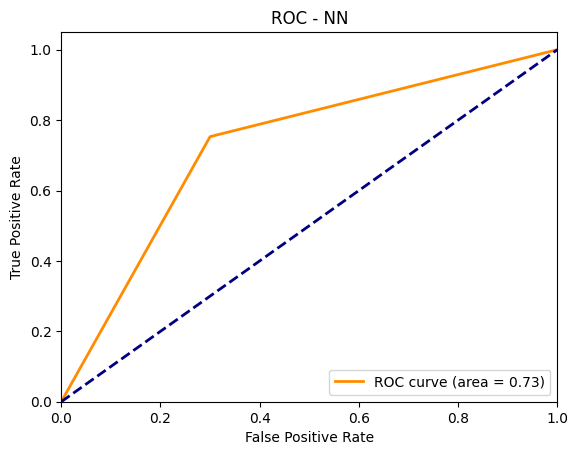

In [111]:
# y_true is the true binary labels (0 or 1) and y_score is the predicted probability scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - NN')
plt.legend(loc="lower right")
plt.show()

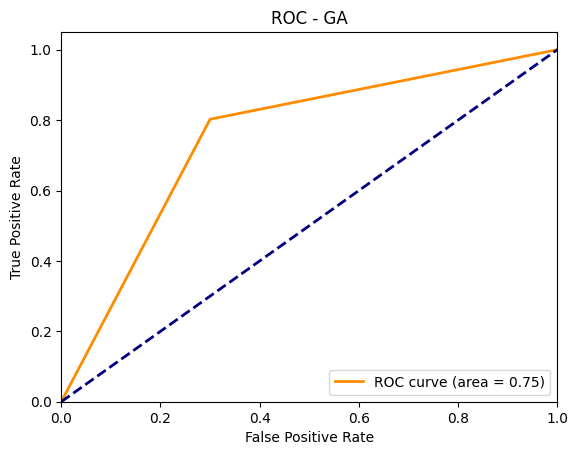

In [112]:
# y_true is the true binary labels (0 or 1) and y_score is the predicted probability scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ga)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - GA')
plt.legend(loc="lower right")
plt.show()

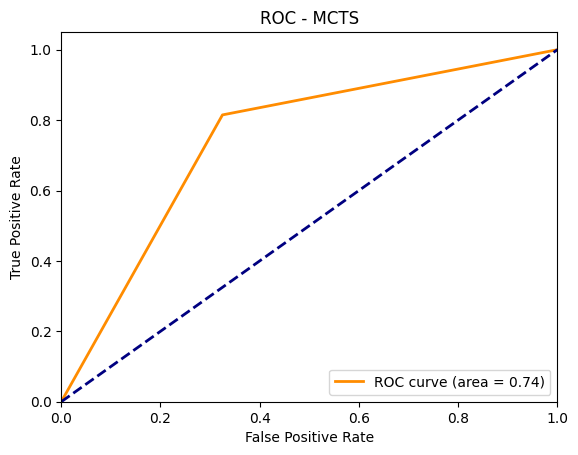

In [113]:
# y_true is the true binary labels (0 or 1) and y_score is the predicted probability scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_mcts)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - MCTS')
plt.legend(loc="lower right")
plt.show()